In [3]:
# @tidy {"drop": true}
# We do this to avoid "extension already loaded" warnings below.
%unload_ext google.colab.data_table

The google.colab.data_table extension is not loaded.


# Data Table Display

Colab includes an extension that renders pandas dataframes into interactive displays that can be filtered, sorted, and explored dynamically.

Data table display for Pandas dataframes can be enabled by running:
```python
from google.colab import data_table
data_table.enable_dataframe_formatter()
```
and disabled by running
```python
from google.colab import data_table
data_table.disable_dataframe_formatter()
```


## Exploring Data Tables

Here is an example of a data table display:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# قراءة الملف بالاسم الجديد
df = pd.read_csv('/social_media_addiction.csv')

# عرض أسماء الأعمدة للتأكد من اسم عمود "الوقت" بالضبط
print("--- أسماء الأعمدة ---")
print(df.columns)

# عرض أول 5 صفوف
display(df.head())

--- أسماء الأعمدة ---
Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time_min',
       'Posts_Per_Day', 'Likes_Received_Daily', 'Comments_Received_Daily',
       'Messages_Sent_Daily', 'Scroll_Rate_ppm', 'Addiction_Level',
       'Emotional_State_Post_Usage', 'Productivity_Loss_Score',
       'Mental_Health_Index', 'FOMO_Score'],
      dtype='object')


,User_ID,Age,Gender,Platform,Daily_Usage_Time_min,Posts_Per_Day,Likes_Received_Daily,Comments_Received_Daily,Messages_Sent_Daily,Scroll_Rate_ppm,Addiction_Level,Emotional_State_Post_Usage,Productivity_Loss_Score,Mental_Health_Index,FOMO_Score
0,1001,23,Female,Instagram,145,3,120,25,45,40,High,Anxious,7,45,8
1,1002,19,Male,TikTok,210,1,45,5,10,85,Severe,Depressed,9,30,9
2,1003,28,Female,LinkedIn,45,0,5,2,15,10,Low,Motivated,2,80,3
3,1004,35,Male,Facebook,90,2,30,10,20,25,Moderate,Neutral,4,65,5
4,1005,21,Non-binary,Twitter,180,15,200,60,50,55,High,Stressed,8,40,7


--- متوسط دقائق الاستخدام لكل منصة ---
Platform
TikTok       225.0
Discord      200.0
YouTube      185.0
Snapchat     182.5
Twitter      150.0
Reddit       150.0
Instagram    105.0
Facebook      60.0
LinkedIn      32.5
Pinterest     30.0
Name: Daily_Usage_Time_min, dtype: float64


/tmp/ipython-input-3157053792.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_usage.index, y=platform_usage.values, palette='magma')


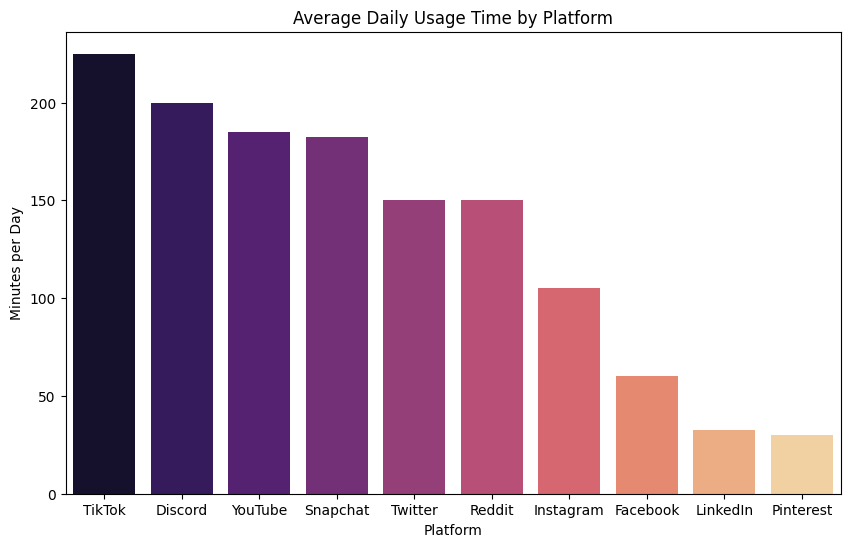

In [3]:
# حساب متوسط الاستخدام لكل منصة
platform_usage = df.groupby('Platform')['Daily_Usage_Time_min'].mean().sort_values(ascending=False)

print("--- متوسط دقائق الاستخدام لكل منصة ---")
print(platform_usage)

# الرسم البياني
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_usage.index, y=platform_usage.values, palette='magma')
plt.title('Average Daily Usage Time by Platform')
plt.xlabel('Platform')
plt.ylabel('Minutes per Day')
plt.show()

/tmp/ipython-input-2231239870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Daily_Usage_Time_min', data=df, palette='pastel')


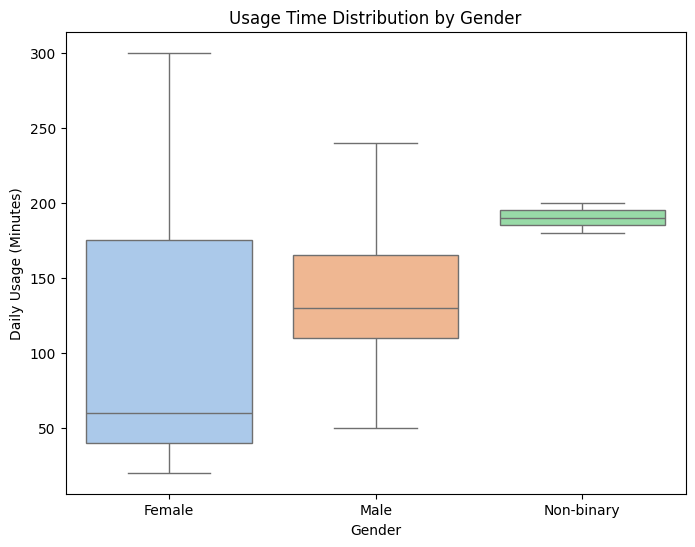

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Daily_Usage_Time_min', data=df, palette='pastel')
plt.title('Usage Time Distribution by Gender')
plt.ylabel('Daily Usage (Minutes)')
plt.show()

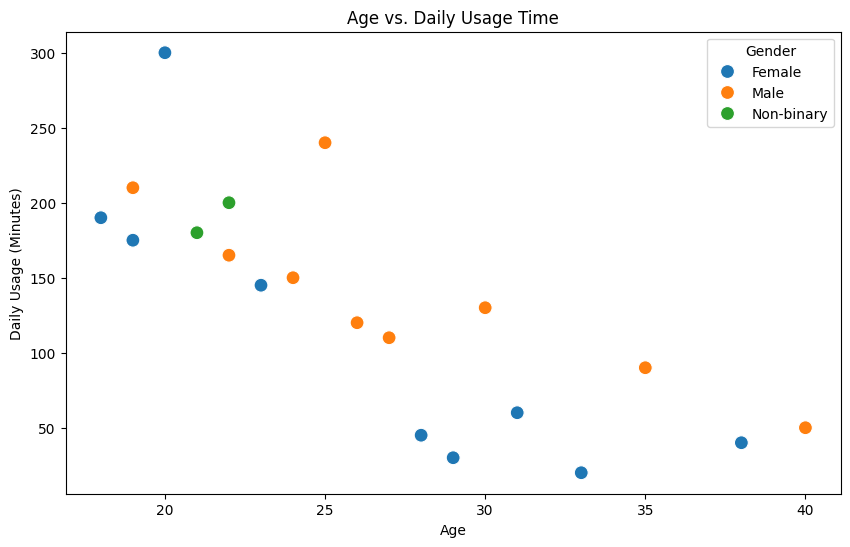

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Daily_Usage_Time_min', data=df, hue='Gender', s=100)
plt.title('Age vs. Daily Usage Time')
plt.xlabel('Age')
plt.ylabel('Daily Usage (Minutes)')
plt.legend(title='Gender')
plt.show()

In [ ]:
from google.colab import data_table
import vega_datasets

data_table.enable_dataframe_formatter()

vega_datasets.data.airports()

A few interesting features of the data table display:

- Clicking the <button>Filter</button> button in the upper right allows you to search for terms or values in any particular column.
- Clicking on any column title lets you sort the results according to that column's value.
- The table displays only a subset of the data at a time. You can navigate through pages of data using the controls on the lower right.


## Disabling Data Table Display

To restore the native pandas dataframe display, use the following:

In [ ]:
from google.colab import data_table

data_table.disable_dataframe_formatter()

vega_datasets.data.airports()

## Customizing the Data Table Display

If you would like to create data tables directly, you can do that with the Python API, which allows additional customizations via keyword arguments:

In [ ]:
from google.colab import data_table

data_table.DataTable(
    vega_datasets.data.airports(), include_index=False, num_rows_per_page=10
)